<h1 style="text-align: center;"><a title="Data Science-AIMS-Cmr-2021-22">Regularizations in Linear Regression </h1>

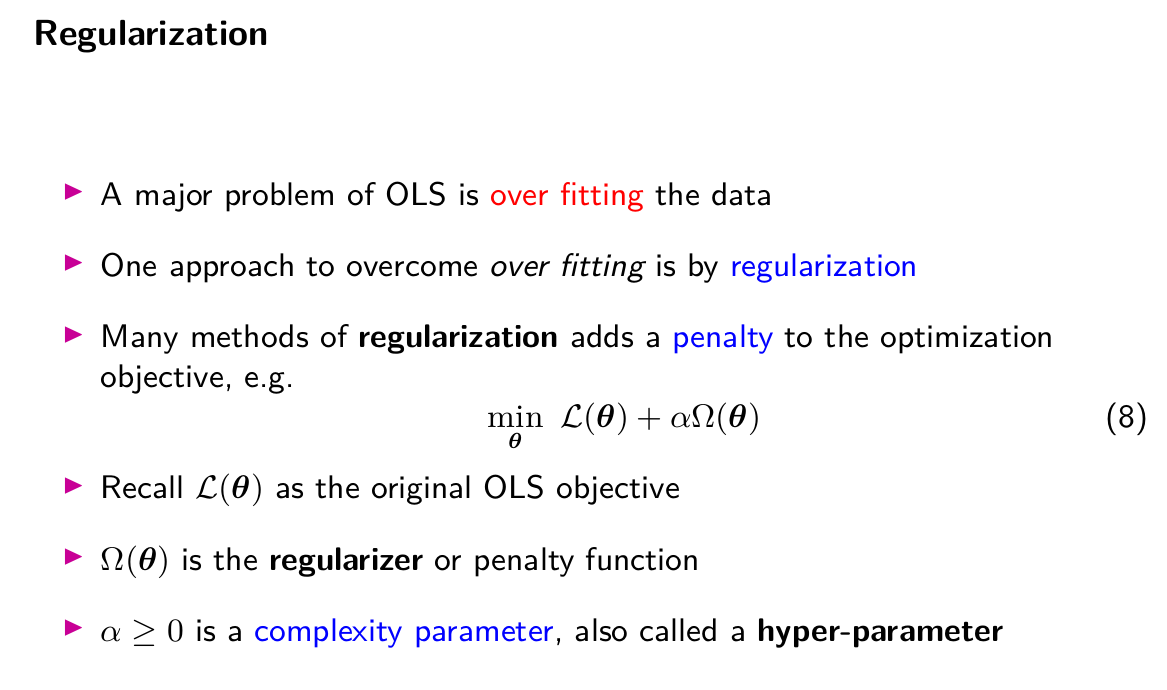

In [87]:
from IPython.display import Image
Image('slides/slide_00.png' , width=700)

# Ridge and Lasso Regression

## Introduction

At this point, you've seen a number of criteria and algorithms for fitting regression models to data. You've seen the simple linear regression using ordinary least squares, and you will see soon, more general regression of polynomial functions. You've also seen how we can overfit models to data using polynomials and interactions. With all of that, you began to explore other tools to analyze this general problem of overfitting versus underfitting, all this using training and test splits, bias and variance, and cross validation.

Now you're going to take a look at another way to tune the models you create. These methods all modify the mean squared error function that you are optimizing against. The modifications will add a penalty for large coefficient weights in the resulting model.

## Objectives

You will be able to:

- Define Lasso regression 
- Define Ridge regression 
- Describe why standardization is necessary before Ridge and Lasso regression 
- Compare and contrast Lasso, Ridge, and non-regularized regression 
- Use Lasso and Ridge regression with scikit-learn 

## Our regression cost function

From an earlier lesson, you know that when solving for a linear regression, you can express the cost function as

$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (\theta x_i + b))^2$$

This is the expression for simple linear regression (for 1 predictor $x$). If you have multiple predictors, you would have something that looks like:

$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(\theta_jx_{ij} ) -b )^2$$

where $k$ is the number of predictors.

## Penalized estimation

You've seen that when the number of predictors increases, your model complexity increases, with a higher chance of overfitting as a result. We've previously seen fairly ad-hoc variable selection methods (such as forward/backward selection), to simply select a few variables from a longer list of variables as predictors. 

Now, instead of completely "deleting" certain predictors from a model (which is equal to setting coefficients equal to zero), wouldn't it be interesting to just reduce the values of the coefficients to make them less sensitive to noise in the data? *Penalized estimation* operates in a way where parameter shrinkage effects are used to make some or all of the coefficients smaller in magnitude (closer to zero). Some of the penalties have the property of performing both variable selection (setting some coefficients exactly equal to zero) and shrinking the other coefficients. Ridge and Lasso regression are two examples of penalized estimation. There are multiple advantages to using these methods:

- They reduce model complexity
- The may prevent from overfitting
- Some of them may perform variable selection at the same time (when coefficients are set to 0)
- They can be used to counter multicollinearity

Lasso and Ridge are two commonly used so-called **regularization techniques**. Regularization is a general term used when one tries to battle overfitting. Regularization techniques will be covered in more depth when we're moving into machine learning!

## a. Ridge regression

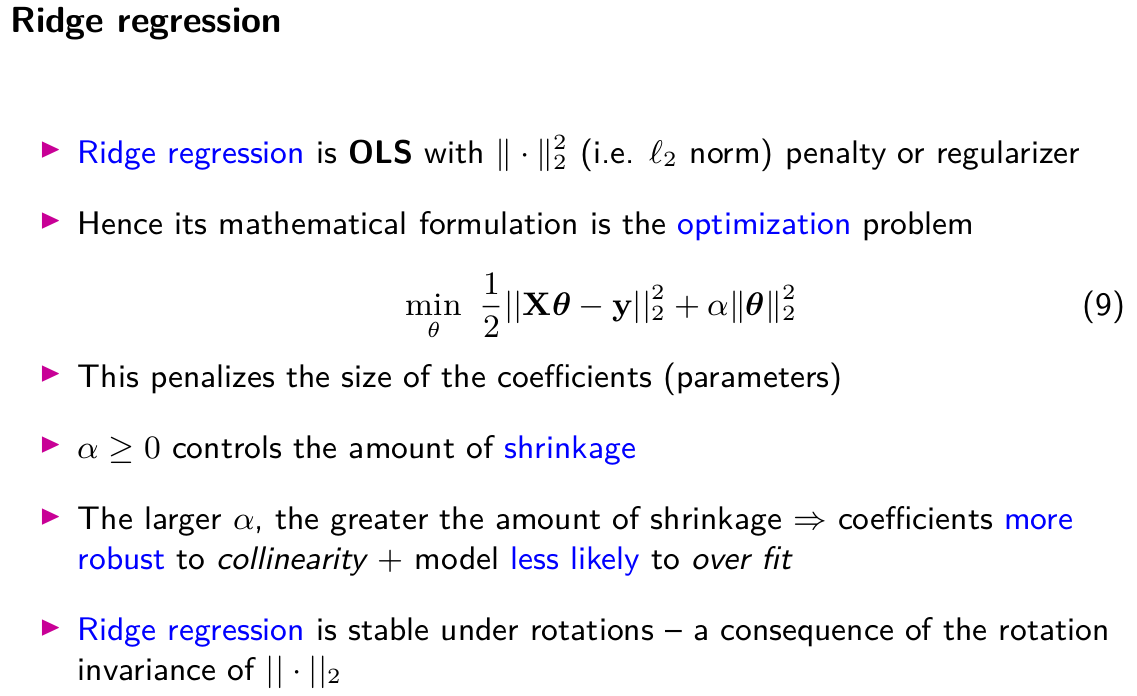

In [86]:
Image('slides/slide_01.png' , width=700)

In ridge regression, the cost function is changed by adding a penalty term to the square of the magnitude of the coefficients.

$$\begin{aligned} \text{cost_function_ridge}&= \frac{1}{2n}\sum_{i=1}^n(y_i - \hat{y})^2 + \lambda ||\theta||^{2}_{2} \\ &= \frac{1}{2n}\sum_{i=1}^n(y_i - \sum_{j=1}^k(\theta_jx_{ij})-b)^2 + \frac{1}{2}\lambda \sum_{j=1}^p \theta_j^2 \end{aligned}$$ 

If you have two predictors (p=2), then the full equation would look like this (notice that there is a penalty term $\lambda$ for each predictor in the model - in this case, two) : 

$$ \text{cost_function_ridge}= \frac{1}{2n}\sum_{i=1}^n(y_i - ((\theta_1x_{1i} + \theta_2x_{2i})-b)^2  +\frac{1}{2}(\lambda \theta_1^2 +\lambda \theta
_2^2)$$



Remember that you want to minimize your cost function, so by adding the penalty term $\lambda$, ridge regression puts a constraint on the coefficients $\theta$. This means that large coefficients penalize the optimization function. That's why ridge regression leads to a shrinkage of the coefficients and helps to reduce model complexity and multicollinearity.

$\lambda$ is a so-called *hyperparameter*, which means you have to specify the value for lambda. For a small lambda, the outcome of your ridge regression will resemble a linear regression model. For large lambda, penalization will increase and more parameters will shrink.

Ridge regression is often also referred to as **L2 Norm Regularization**. 

## Limitations of Ridge

Ridge does not eliminate coefficients in your model even if the variables are irrelevant. This can be negative if you have more features than observations (if m<n).

## b. Lasso regression

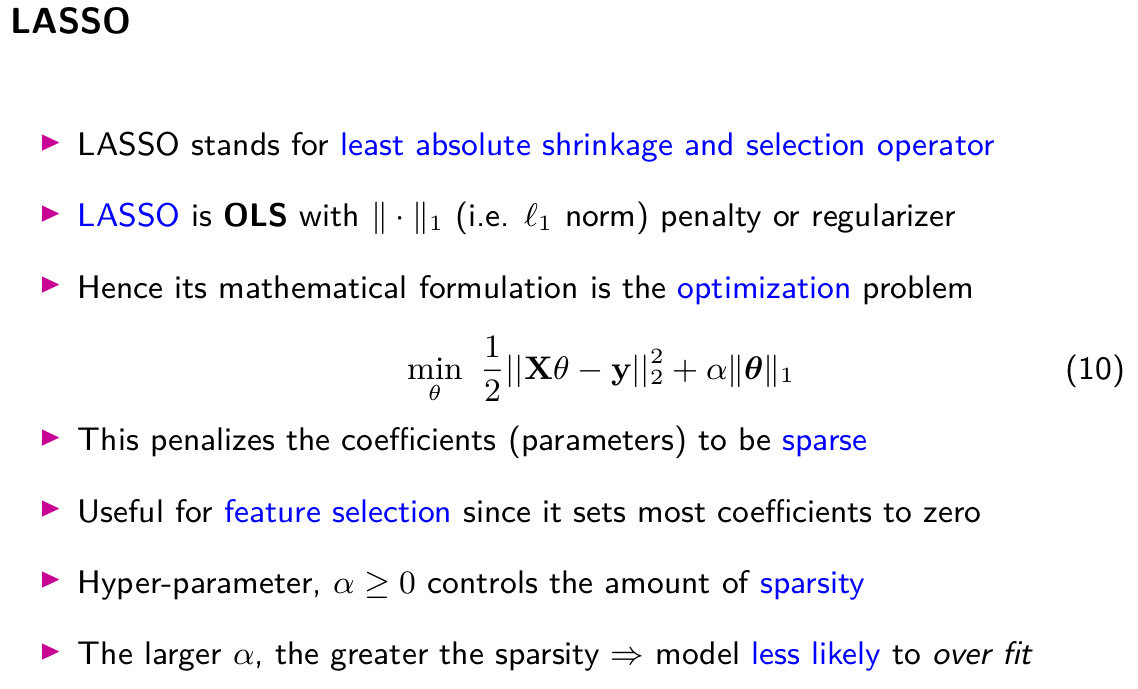

In [85]:
Image('slides/slide_02.png' , width=700)

Lasso regression is very similar to Ridge regression, except that the magnitude of the coefficients are not squared in the penalty term. So, while Ridge regression keeps the sum of the squared regression coefficients (except for the intercept) bounded, the Lasso method bounds the sum of the absolute values.

The resulting cost function looks like this:

$$\begin{aligned} \text{cost_function_lasso}&= \frac{1}{2n}\sum_{i=1}^n(y_i - \hat{y})^2 + \lambda ||\theta||_{1} \\ &= \frac{1}{2n}\sum_{i=1}^n(y_i - \sum_{j=1}^k(\theta_jx_{ij})-b)^2 + \frac{1}{2}\lambda \sum_{j=1}^p |\theta_j| \end{aligned}$$ 

$$ \text{cost_function_lasso}= \frac{1}{2n} \sum_{i=1}^n(y_i - \hat{y})^2 = \frac{1}{2n} \sum_{i=1}^n(y_i - \sum_{j=1}^k(\theta_jx_{ij})-b)^2 + \frac{1}{2}\lambda \sum_{j=1}^p \mid \theta_j \mid$$

If you have two predictors the full equation would look like this (notice that there is a penalty term `m` for each predictor in the model - in this case, two): 

$$ \text{cost_function_lasso}= \frac{1}{2n}\sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$\frac{1}{2n}\sum_{i=1}^n(y_i - (\theta_1x_{1i} + \theta_2x_{2i})-b)^2  + \lambda \mid \theta_1 \mid + \lambda \mid \theta_2 \mid $$

The name "Lasso" comes from "Least Absolute Shrinkage and Selection Operator".

While it may look similar to the definition of the Ridge estimator, the effect of the absolute values is that some coefficients might be set exactly equal to zero, while other coefficients are shrunk towards zero. Hence the Lasso method is attractive because it performs estimation *and* selection simultaneously. Especially for variable selection when the number of predictors is very high.

Lasso regression is often also referred to as **L1 Norm Regularization**. 

## Limitations of Lasso 

Lasso does not work well with multicollinearity. If you are unfamiliar, multicollinearity occurs when some of the dependent variables are correlated with each other. Why? Lasso might randomly choose one of the multicollinear variables without understanding the context. Such an action might eliminate relevant independent variables.


## c. Elastic Net

Elastic Net combines characteristics of both lasso and ridge. Elastic Net reduces the impact of different features while not eliminating all of the features.
The formula as you can see below is the sum of the lasso and ridge formulas.

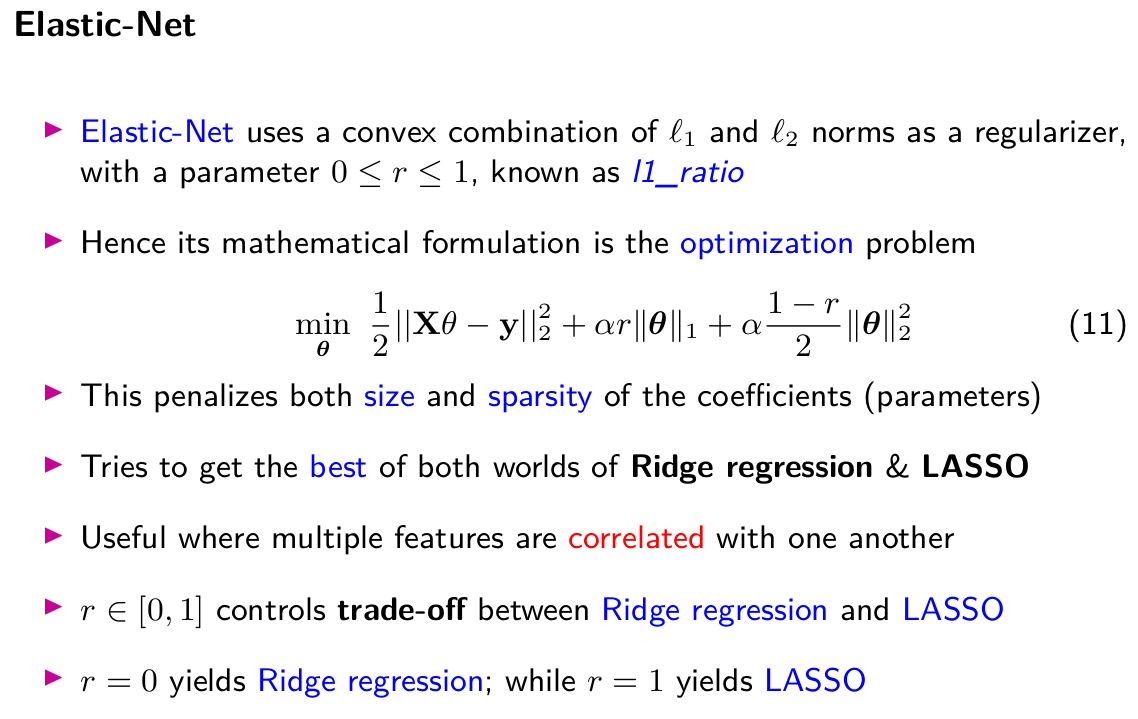

In [84]:
Image('slides/slide_04.png' , width=700)

$$ \begin{aligned} \text{cost_function_ElasticNet} &= \frac{1}{2n}\sum_{i=1}^n(y_i - \hat{y})^2 = \frac{1}{2n}\sum_{i=1}^n(y_i - \sum_{j=1}^k(\theta_jx_{ij})-b)^2 + \frac{1}{2}\lambda (1 - L1_{ratio})\sum_{j=1}^p \theta_j^2 + \frac{1}{2}\lambda L1_{ratio}\sum_{j=1}^p \mid \theta_j \mid \end{aligned}$$

Taking a look at the L1ratio term , by default, it is set to 0.5. 
    The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. 
    
* For ``l1_ratio = 0`` the penalty is an L2 penalty. 
* For `` l1_ratio = 1`` it
    is an L1 penalty.  
* For ``0 < l1_ratio < 1``, the penalty is a
    combination of L1 and L2.

### Standardization before Regularization

An important step before using either Lasso or Ridge regularization is to first standardize your data such that it is all on the same scale. Regularization is based on the concept of penalizing larger coefficients, so if you have features that are on different scales, some will get unfairly penalized. Below, you can see that we are using a `MinMaxScaler` to standardize our data to the same scale. A downside of standardization is that the value of the coefficients become less interpretable and must be transformed back to their original scale if you want to interpret how a one unit change in a feature impacts the target variable.

## An example using our `auto-mpg` data

Let's transform our continuous predictors in `auto-mpg` and see how they perform as predictors in a Ridge versus Lasso regression. 

We import the dataset and, seperate the target and predictors and then split the data into training and test sets: 

In [1]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression , ElasticNet
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_02/auto-mpg.csv') 

y = data[['mpg']]
X = data.drop(['mpg', 'car name', 'origin'], axis=1)

# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

After splitting the data into training and test sets, we use the `MixMaxScaler()` to fit and transform `X_train` and transform `X_test`. 

> NOTE: You want to fit and transform only the **training data** because in a real-world setting, you only have access to this data. You can then use the same scalar object to **transform** the test data. It's not uncommon for people to first transform the data and then split into training and test sets -- which leads to **data-leakage**. 

In [2]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

We will now fit the Ridge, Lasso, and Linear regression models to the transformed training data. Notice that the Ridge and Lasso models have the parameter alpha, which is Scikit-Learn's version of $\lambda$ in the regularization cost functions.

In [4]:
# Build a Ridge, Lasso, Elastic Net regular linear regression model  
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train)




Ridge(alpha=0.5)

In [35]:
ridge?

In [5]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train)



Lasso(alpha=0.5)

In [6]:
lin = LinearRegression()
lin.fit(X_train_transformed, y_train)



LinearRegression()

In [7]:
Ela = ElasticNet(alpha=0.5 , l1_ratio=0.5)
Ela.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.5)

Next, let's generate predictions for both the training and test sets: 

In [8]:
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (274, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (118, 1))

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)


y_h_Ela_train = Ela.predict(X_train_transformed)
y_h_Ela_test = Ela.predict(X_test_transformed)

Look at the RSS for training and test sets for each of the three models: 

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
print('Train Error Ridge Model', mean_squared_error(y_train , y_h_ridge_train))
print('Test Error Ridge Model', mean_squared_error(y_test , y_h_ridge_test))
print('\n')

print('Train Error Lasso Model', mean_squared_error(y_train , y_h_lasso_train))
print('Test Error Lasso Model', mean_squared_error(y_test , y_h_lasso_test))
print('\n')

print('Train Error Unpenalized Linear Model', mean_squared_error(y_train , lin.predict(X_train_transformed)))
print('Test Error Unpenalized Linear Model', mean_squared_error(y_test , lin.predict(X_test_transformed)))
print('\n')

print('Train Error Elastic Net Model', mean_squared_error(y_train , Ela.predict(X_train_transformed).reshape(-1,1)))
print('Test Error Elastic Net  Model', mean_squared_error(y_test , Ela.predict(X_test_transformed).reshape(-1,1)))

Train Error Ridge Model 9.798079515529826
Test Error Ridge Model 17.523692433834437


Train Error Lasso Model 16.244450797081793
Test Error Lasso Model 30.03463631503097


Train Error Unpenalized Linear Model 9.700888480581275
Test Error Unpenalized Linear Model 16.74802531396471


Train Error Elastic Net Model 24.892193990529808
Test Error Elastic Net  Model 41.55786879080367


We note that Ridge is clearly better than Lasso here, but that the unpenalized model performs best here. Let's see how including Ridge and Lasso changed our parameter estimates.

In [11]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)
print('ElasticNet model parameter coefficients:', Ela.coef_)

Ridge parameter coefficients: [[ -2.06904445  -2.88593443  -1.81801505 -15.23785349  -1.45594148
    8.1440177 ]]
Lasso parameter coefficients: [-9.09743525 -0.         -0.         -4.02703963  0.          3.92348219]
Linear model parameter coefficients: [[ -1.33790698  -1.05300843  -0.08661412 -19.26724989  -0.37043697
    8.56051229]]
ElasticNet model parameter coefficients: [-3.22644844 -2.47894175 -1.58939129 -2.42975477  0.          2.14927799]


Did you notice that Lasso shrinked a few parameters to 0? The Ridge regression mostly affected the fourth parameter (estimated to be -19.26 for the linear regression model).

## GridSearch 

The GridSearch allows you to highlight the best parameters.

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [42]:
from sklearn.model_selection import GridSearchCV , KFold

In [45]:
cv = KFold(n_splits=4)

In [46]:
lr = LinearRegression()

In [49]:
LinearRegression?

In [50]:
# define grid
grid_lr = dict()
grid_lr['normalize'] = [True , False]
grid_lr['fit_intercept'] = [True , False]
grid_lr

{'normalize': [True, False], 'fit_intercept': [True, False]}

In [51]:
Ela?

In [53]:
# define grid
grid_Enet = dict()
grid_Enet['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid_Enet['l1_ratio'] = np.arange(0, 1, 0.1)
grid_Enet['fit_intercept'] =  [True , False]

In [54]:
grid_Enet

{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0],
 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'fit_intercept': [True, False]}

In [56]:
# define search
search_Lr = GridSearchCV(lr, grid_lr, scoring='neg_mean_squared_error', cv=cv , n_jobs=-1)
#sorted(sklearn.metrics.SCORERS.keys())

In [69]:
# perform the search
results_lr = search_Lr.fit(X_train_transformed, y_train)

/home/rockefeller/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [70]:
results_lr.best_params_

{'fit_intercept': True, 'normalize': True}

In [71]:
y_pred_lr = results_lr.predict(X_test_transformed)

In [72]:
mean_squared_error(y_test , y_pred_lr)

16.7480253139647

In [74]:
import joblib

joblib.dump(results_lr, 'my_good_lr_model.pkl')


['my_good_lr_model.pkl']

In [78]:
joblib.load('my_good_lr_model.pkl').score(X_test_transformed, y_test)

-16.7480253139647

In [81]:
# summarize
mse = -1*results_lr.best_score_
print('MSE: %.3f' % mse)
print('Config: %s' % results_lr.best_params_)

MSE: 11.310
Config: {'fit_intercept': True, 'normalize': True}


In [24]:
Ela_gs = ElasticNet(**results.best_params_)

In [25]:
Ela_gs.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.99)

In [26]:
y_h_Ela_train = Ela_gs.predict(X_train_transformed)
y_h_Ela_test = Ela_gs.predict(X_test_transformed)

In [27]:
print('Train Error Elastic Net Model', mean_squared_error(y_train , Ela_gs.predict(X_train_transformed).reshape(-1,1)))
print('Test Error Elastic Net  Model', mean_squared_error(y_test , Ela_gs.predict(X_test_transformed).reshape(-1,1)))

Train Error Elastic Net Model 10.072480205425634
Test Error Elastic Net  Model 18.305697061586166


In [28]:
print('ElasticNet model parameter coefficients after GridSearchCV:', Ela_gs.coef_)

ElasticNet model parameter coefficients after GridSearchCV: [ -3.47536512  -0.95915757  -0.         -15.14658508   0.
   7.52669943]


## Conclusion

* Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response).

* Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response).

Checking the correlation matrix between predictors could be a way of addressing this issue.

Keep in mind that ridge regression can't zero out coefficients; thus, you either end up including all the coefficients in the model, or none of them. In contrast, the LASSO does both parameter shrinkage and variable selection automatically. 

If some of your covariates are highly correlated, you may want to look at the Elastic Net instead of the LASSO.